<font size="12">
    
<div align="center"> Projet: Odor tracking </div>

</font>

&nbsp;
&nbsp; 

<font size="6">
    
<div align="center"> Algorithme 2: probabilités dans un champs de concentration </div>

</font>

&nbsp;
&nbsp; 

<font size="4">
    
<div align="center"> Amel SOUSSI, Nicolas HENIN, Tom LIONS </div>

</font>

---

<font size ="4">

<br>
 
# 1) Plot pour 1 d 

<br>

</font>

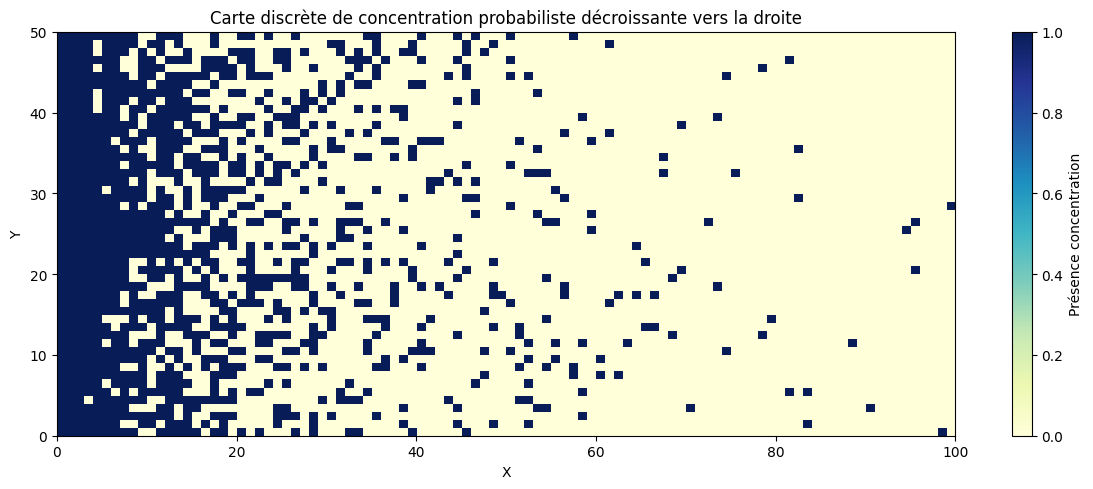

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
domain_x, domain_y = 100, 50
a, b = 10, 6             # Zone source
source_x, source_y = 2, (domain_y-b)//2
d = 6                    # Distance suivie à gauche

# Crée un champ de concentration probabiliste : décroissance exponentielle depuis la gauche
X = np.arange(domain_x)
proba_x = np.exp(-0.05 * (X - source_x))  # max à gauche, min à droite
proba_x = np.clip(proba_x, 0, 1)

# Génère la matrice de concentration
concentration = np.zeros((domain_y, domain_x), dtype=int)
np.random.seed(42)
for x in range(domain_x):
    for y in range(domain_y):
        if np.random.rand() < proba_x[x]:
            concentration[y, x] = 1

# Place la zone source à 1 partout (concentration maximale garantie)
concentration[source_y:source_y+b, source_x:source_x+a] = 1

# Visualisation du champ pour vérification
plt.figure(figsize=(12,5))
plt.imshow(concentration, origin='lower', cmap='YlGnBu', extent=(0, domain_x, 0, domain_y), aspect='auto')
plt.colorbar(label='Présence concentration')
plt.title("Carte discrète de concentration probabiliste décroissante vers la droite")
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

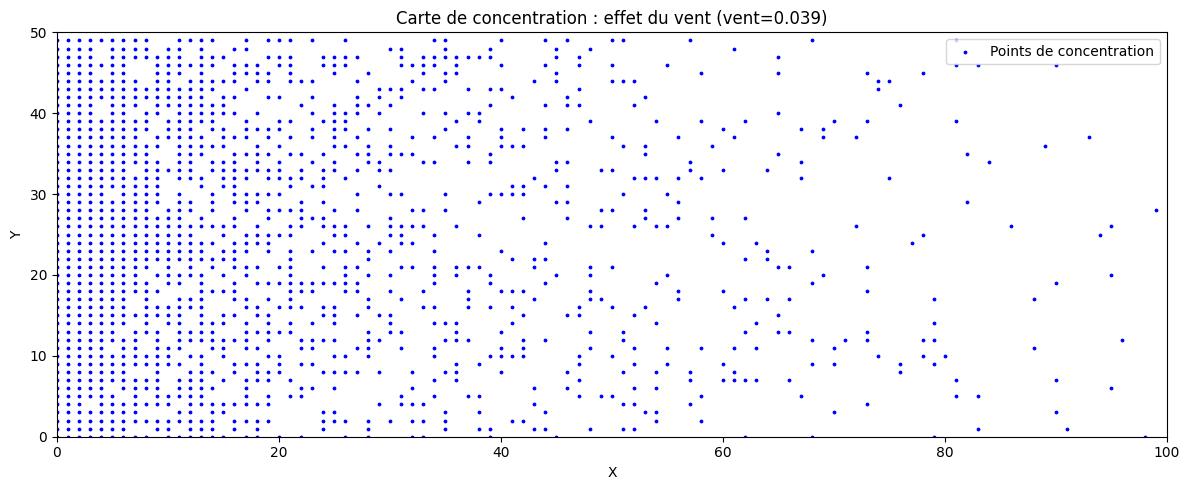

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
domain_x, domain_y = 100, 50
a, b = 10, 6
source_x, source_y = 2, (domain_y-b)//2

vent = 0.039   # Plus c'est petit, plus ça va loin ; plus c'est grand, plus ça chute rapidement

# Génère le profil de probabilité en x modulé par le vent
X = np.arange(domain_x)
proba_x = np.exp(-vent * (X - source_x))
proba_x = np.clip(proba_x, 0, 1)

# Matrice de concentration
concentration = np.zeros((domain_y, domain_x), dtype=int)
np.random.seed(42)
for x in range(domain_x):
    for y in range(domain_y):
        if np.random.rand() < proba_x[x]:
            concentration[y, x] = 1

# Zone source garantie concentrée
concentration[source_y:source_y+b, source_x:source_x+a] = 1

# Récupère les coordonnées des points de concentration actifs
y_pts, x_pts = np.where(concentration == 1)  # Attention à l'ordre : y puis x

plt.figure(figsize=(12,5))
plt.scatter(x_pts, y_pts, c='b', s=3, label="Points de concentration")  # points très fins bleus
plt.title(f"Carte de concentration : effet du vent (vent={vent})")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim(0, domain_x)
plt.ylim(0, domain_y)
plt.tight_layout()
plt.show()


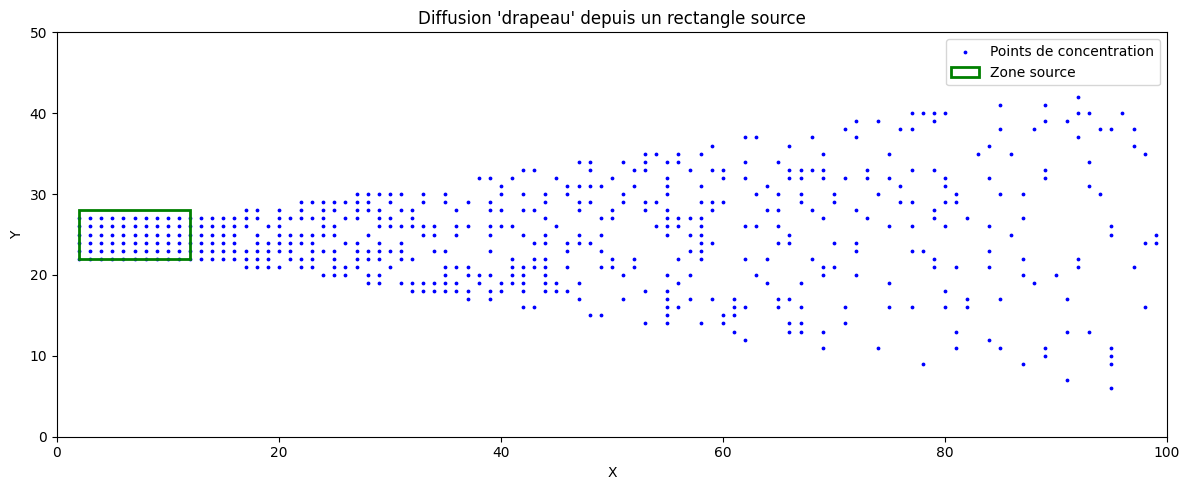

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du domaine et de la source
domain_x, domain_y = 100, 50
a, b = 10, 6
source_x, source_y = 2, (domain_y-b)//2

vent = 0.03  # module la portée du drapeau

# Création matrice
concentration = np.zeros((domain_y, domain_x), dtype=int)
np.random.seed(42)

# Place la source : rectangle pleine concentration
concentration[source_y:source_y+b, source_x:source_x+a] = 1

# Diffusion en drapeau : pour chaque colonne à droite de la source, probabilité en fonction de la distance
for x in range(source_x+a, domain_x):
    # Largeur du drapeau qui s'élargit progressivement (ici simple ; adapte selon effet souhaité)
    spread = int(b/2 + (x - (source_x+a))*0.2)
    y_center = source_y + b//2
    y_min = max(0, y_center - spread)
    y_max = min(domain_y, y_center + spread)
    p = np.exp(-vent * (x - (source_x+a)))
    for y in range(y_min, y_max):
        if np.random.rand() < p:
            concentration[y, x] = 1

# Affichage par petits points pour la granularité
y_pts, x_pts = np.where(concentration == 1)
plt.figure(figsize=(12,5))
plt.scatter(x_pts, y_pts, c='b', s=3, label="Points de concentration")
rect = plt.Rectangle((source_x, source_y), a, b, edgecolor='g', facecolor='none', lw=2, label='Zone source')
plt.gca().add_patch(rect)
plt.title("Diffusion 'drapeau' depuis un rectangle source")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim(0, domain_x)
plt.ylim(0, domain_y)
plt.tight_layout()
plt.show()


Succès


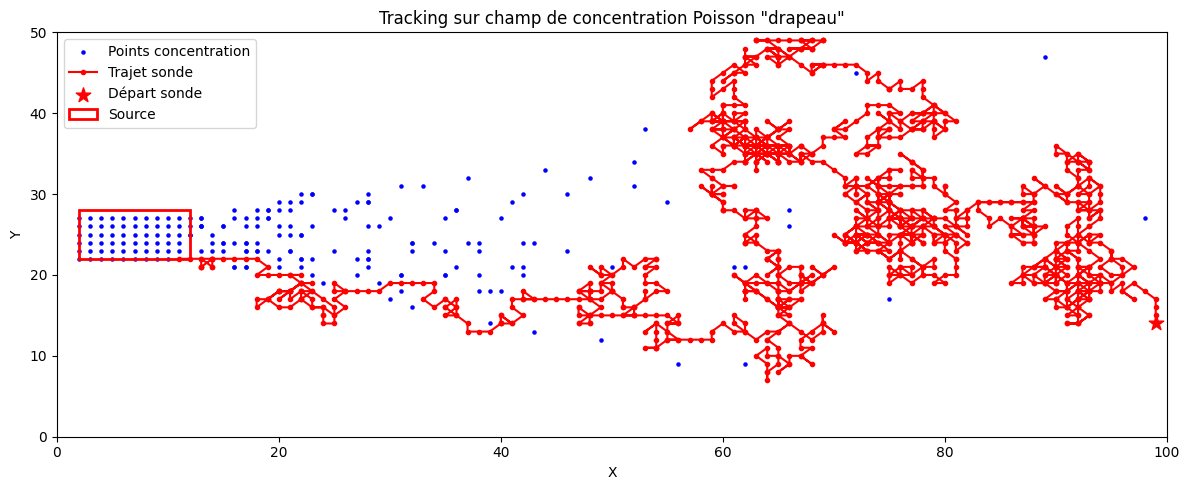

In [79]:
import numpy as np
import matplotlib.pyplot as plt

domain_x, domain_y = 100, 50
a, b = 10, 6
source_x, source_y = 2, (domain_y-b)//2

# np.random.seed(42)

# Paramètre Poisson en fonction de la distance à la source (décrément exponentiel)
base_lambda = 8       # Forte concentration proche de la source
k_decay = 0.05        # Vitesse de chute de lambda vers la droite
s_spread = 0.3        # Taux d'élargissement du drapeau
x_pts, y_pts = [], []

# Place la source (rectangle à gauche)
for x in range(source_x, source_x+a):
    for y in range(source_y, source_y+b):
        x_pts.append(x)
        y_pts.append(y)

# Drapeau par loi de Poisson à chaque x à droite
for x in range(source_x + a, domain_x):
    lambda_x = base_lambda * np.exp(-k_decay * (x - (source_x + a)))
    n_particles = np.random.poisson(lambda_x)
    # Largeur croissante (ici traînée de plus en plus large)
    spread = int(b/2 + (x - (source_x+a))*s_spread)  # 0.5 ajuste le taux d'élargissement
    y_center = source_y + b//2
    y_min = max(0, y_center - spread)
    y_max = min(domain_y, y_center + spread)
    for _ in range(n_particles):
        y = np.random.randint(y_min, y_max)
        x_pts.append(x)
        y_pts.append(y)

# plt.figure(figsize=(12,5))
# plt.scatter(x_pts, y_pts, c='b', s=5)
# rect = plt.Rectangle((source_x, source_y), a, b, edgecolor='r', facecolor='none', lw=2, label='Source')
# plt.gca().add_patch(rect)
# plt.title('Concentration par loi de Poisson avec décroissance vers la droite')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.xlim(0, domain_x)
# plt.ylim(0, domain_y)
# plt.tight_layout()
# plt.show()

concentration = np.zeros((domain_y, domain_x), dtype=int)
for x, y in zip(x_pts, y_pts):
    concentration[y, x] = 1


sonde_x, sonde_y = domain_x-1, np.random.randint(0, domain_y)
trajet_sonde = [(sonde_x, sonde_y)]
max_tot_iter = 3000
total_iter = 0
d = 4 
found = False

def dans_source(x, y):
    return source_x <= x < source_x + a and source_y <= y < source_y + b

while sonde_x > 0 and not found and not dans_source(sonde_x, sonde_y) and total_iter < max_tot_iter:
    sonde_x += np.random.choice([-1, 0, 1])
    sonde_y += np.random.choice([-1, 0, 1])
    sonde_x = min(max(sonde_x, 0), domain_x-1)
    sonde_y = min(max(sonde_y, 0), domain_y-1)
    trajet_sonde.append((sonde_x, sonde_y))
    total_iter += 1
    if concentration[sonde_y, sonde_x] == 1:
        for _ in range(d):
            sonde_x -= 1
            sonde_x = max(sonde_x, 0)
            trajet_sonde.append((sonde_x, sonde_y))
            total_iter += 1
            if dans_source(sonde_x, sonde_y):
                found = True
                break
    if dans_source(sonde_x, sonde_y):
        found = True
        break

print("Succès" if found else "Echec (maximum d'itérations atteint sans trouver la source)")

plt.figure(figsize=(12,5))
plt.scatter(x_pts, y_pts, c='b', s=5, label='Points concentration')
trajet_x, trajet_y = zip(*trajet_sonde)
plt.plot(trajet_x, trajet_y, 'r.-', label='Trajet sonde')
plt.scatter([trajet_x[0]], [trajet_y[0]], c='red', s=120, marker='*', label='Départ sonde')
rect = plt.Rectangle((source_x, source_y), a, b, edgecolor='r', facecolor='none', lw=2, label='Source')
plt.gca().add_patch(rect)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Tracking sur champ de concentration Poisson "drapeau"')
plt.xlim(0, domain_x)
plt.ylim(0, domain_y)
plt.tight_layout()
plt.show()




---

<font size ="4">

<br>
 
# 2) Boucle pour plusieurs d 

<br>

</font>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

domain_x, domain_y = 100, 50
a, b = 10, 6
source_x, source_y = 2, (domain_y-b)//2

# Paramètres du champ Poisson
base_lambda = 8
k_decay = 0.05
s_spread = 0.3
n_essais = 300
d_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

results = []

for d in d_values:
    succès = 0
    nb_pas_succes = []
    for essai in range(n_essais):
        # Regénère un champ Poisson à chaque essai (événements indépendants)
        x_pts, y_pts = [], []
        for x in range(source_x, source_x+a):
            for y in range(source_y, source_y+b):
                x_pts.append(x)
                y_pts.append(y)
        for x in range(source_x + a, domain_x):
            lambda_x = base_lambda * np.exp(-k_decay * (x - (source_x + a)))
            n_particles = np.random.poisson(lambda_x)
            spread = int(b/2 + (x - (source_x+a))*s_spread)
            y_center = source_y + b//2
            y_min = max(0, y_center - spread)
            y_max = min(domain_y, y_center + spread)
            for _ in range(n_particles):
                y = np.random.randint(y_min, y_max)
                x_pts.append(x)
                y_pts.append(y)

        concentration = np.zeros((domain_y, domain_x), dtype=int)
        for x, y in zip(x_pts, y_pts):
            concentration[y, x] = 1

        sonde_x, sonde_y = domain_x-1, np.random.randint(0, domain_y)
        trajet_sonde = [(sonde_x, sonde_y)]
        max_tot_iter = 3000
        total_iter = 0
        found = False

        def dans_source(x, y):
            return source_x <= x < source_x + a and source_y <= y < source_y + b

        while sonde_x > 0 and not found and not dans_source(sonde_x, sonde_y) and total_iter < max_tot_iter:
            sonde_x += np.random.choice([-1, 0, 1])
            sonde_y += np.random.choice([-1, 0, 1])
            sonde_x = min(max(sonde_x, 0), domain_x-1)
            sonde_y = min(max(sonde_y, 0), domain_y-1)
            trajet_sonde.append((sonde_x, sonde_y))
            total_iter += 1
            if concentration[sonde_y, sonde_x] == 1:
                for _ in range(d):
                    sonde_x -= 1
                    sonde_x = max(sonde_x, 0)
                    trajet_sonde.append((sonde_x, sonde_y))
                    total_iter += 1
                    if dans_source(sonde_x, sonde_y):
                        found = True
                        break
            if dans_source(sonde_x, sonde_y):
                found = True
                break
        if found:
            succès += 1
            nb_pas_succes.append(total_iter)

    # Stocke les résultats du paramètre d
    moy_nb_pas = np.mean(nb_pas_succes) if nb_pas_succes else None
    results.append({'d': d, 'succès': succès, 'essais': n_essais, 'moy_nb_pas': moy_nb_pas})

# Affichage
print("\n--- Comparatif sur différentes valeurs de d ---")
for res in results:
    print(f"d={res['d']:<3} - Succès : {res['succès']}/{res['essais']} - Moyenne pas : {res['moy_nb_pas'] if res['moy_nb_pas'] is not None else 'aucun'}")

# Barplot résultats
d_labels = [str(r['d']) for r in results]
moy_nb_pas = [r['moy_nb_pas'] if r['moy_nb_pas'] is not None else 0 for r in results]
success_percent = [100*r['succès']/r['essais'] for r in results]

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:blue'
ax1.set_xlabel('Distance d sur la concentration')
ax1.set_ylabel('Pas moyens (succès)', color=color)
ax1.bar(d_labels, moy_nb_pas, color=color, alpha=0.7, label='Pas moyens avant succès')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('% Succès', color=color)
ax2.scatter(d_labels, success_percent, color=color, marker='o', label='% Succès')
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"Temps vs taux de succès avec {n_essais} essais par d (Poisson)")
fig.tight_layout()
plt.show()


KeyboardInterrupt: 


--- Comparatif sur différentes valeurs de d ---
d=1   - Succès : 57/200 - Moyenne pas : 2164.7894736842104
d=3   - Succès : 123/200 - Moyenne pas : 1894.0894308943089
d=5   - Succès : 123/200 - Moyenne pas : 1779.5121951219512
d=7   - Succès : 141/200 - Moyenne pas : 1561.1914893617022
d=9   - Succès : 152/200 - Moyenne pas : 1434.8815789473683
d=11  - Succès : 152/200 - Moyenne pas : 1316.6381578947369
d=13  - Succès : 148/200 - Moyenne pas : 1453.2837837837837
d=15  - Succès : 140/200 - Moyenne pas : 1354.2
d=17  - Succès : 128/200 - Moyenne pas : 1191.515625
d=19  - Succès : 116/200 - Moyenne pas : 1213.301724137931
d=21  - Succès : 109/200 - Moyenne pas : 1141.5779816513761
d=23  - Succès : 96/200 - Moyenne pas : 1151.71875
d=25  - Succès : 98/200 - Moyenne pas : 1058.1836734693877
d=30  - Succès : 77/200 - Moyenne pas : 975.7532467532468
d=35  - Succès : 64/200 - Moyenne pas : 968.15625


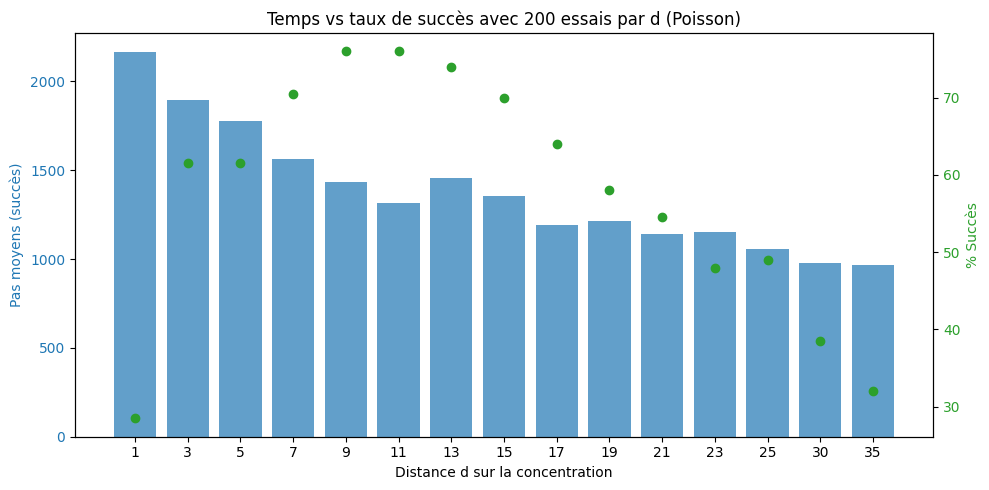

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

domain_x, domain_y = 100, 50
a, b = 10, 6
source_x, source_y = 2, (domain_y-b)//2

# Paramètres du champ Poisson
base_lambda = 8
k_decay = 0.05
s_spread = 0.3
n_essais = 200
d_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 30, 35]

results = []

for d in d_values:
    succès = 0
    nb_pas_succes = []
    for essai in range(n_essais):
        # Regénère un champ Poisson à chaque essai (événements indépendants)
        x_pts, y_pts = [], []
        for x in range(source_x, source_x+a):
            for y in range(source_y, source_y+b):
                x_pts.append(x)
                y_pts.append(y)
        for x in range(source_x + a, domain_x):
            lambda_x = base_lambda * np.exp(-k_decay * (x - (source_x + a)))
            n_particles = np.random.poisson(lambda_x)
            spread = int(b/2 + (x - (source_x+a))*s_spread)
            y_center = source_y + b//2
            y_min = max(0, y_center - spread)
            y_max = min(domain_y, y_center + spread)
            for _ in range(n_particles):
                y = np.random.randint(y_min, y_max)
                x_pts.append(x)
                y_pts.append(y)

        concentration = np.zeros((domain_y, domain_x), dtype=int)
        for x, y in zip(x_pts, y_pts):
            concentration[y, x] = 1

        sonde_x, sonde_y = domain_x-1, np.random.randint(0, domain_y)
        trajet_sonde = [(sonde_x, sonde_y)]
        max_tot_iter = 3000
        total_iter = 0
        found = False

        def dans_source(x, y):
            return source_x <= x < source_x + a and source_y <= y < source_y + b

        while sonde_x > 0 and not found and not dans_source(sonde_x, sonde_y) and total_iter < max_tot_iter:
            sonde_x += np.random.choice([-1, 0, 1])
            sonde_y += np.random.choice([-1, 0, 1])
            sonde_x = min(max(sonde_x, 0), domain_x-1)
            sonde_y = min(max(sonde_y, 0), domain_y-1)
            trajet_sonde.append((sonde_x, sonde_y))
            total_iter += 1
            if concentration[sonde_y, sonde_x] == 1:
                for _ in range(d):
                    sonde_x -= 1
                    sonde_x = max(sonde_x, 0)
                    trajet_sonde.append((sonde_x, sonde_y))
                    total_iter += 1
                    if dans_source(sonde_x, sonde_y):
                        found = True
                        break
            if dans_source(sonde_x, sonde_y):
                found = True
                break
        if found:
            succès += 1
            nb_pas_succes.append(total_iter)

    # Stocke les résultats du paramètre d
    moy_nb_pas = np.mean(nb_pas_succes) if nb_pas_succes else None
    results.append({'d': d, 'succès': succès, 'essais': n_essais, 'moy_nb_pas': moy_nb_pas})

# Affichage
print("\n--- Comparatif sur différentes valeurs de d ---")
for res in results:
    print(f"d={res['d']:<3} - Succès : {res['succès']}/{res['essais']} - Moyenne pas : {res['moy_nb_pas'] if res['moy_nb_pas'] is not None else 'aucun'}")

# Barplot résultats
d_labels = [str(r['d']) for r in results]
moy_nb_pas = [r['moy_nb_pas'] if r['moy_nb_pas'] is not None else 0 for r in results]
success_percent = [100*r['succès']/r['essais'] for r in results]

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:blue'
ax1.set_xlabel('Distance d sur la concentration')
ax1.set_ylabel('Pas moyens (succès)', color=color)
ax1.bar(d_labels, moy_nb_pas, color=color, alpha=0.7, label='Pas moyens avant succès')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('% Succès', color=color)
ax2.scatter(d_labels, success_percent, color=color, marker='o', label='% Succès')
ax2.tick_params(axis='y', labelcolor=color)
plt.title(f"Temps vs taux de succès avec {n_essais} essais par d (Poisson)")
fig.tight_layout()
plt.show()


---

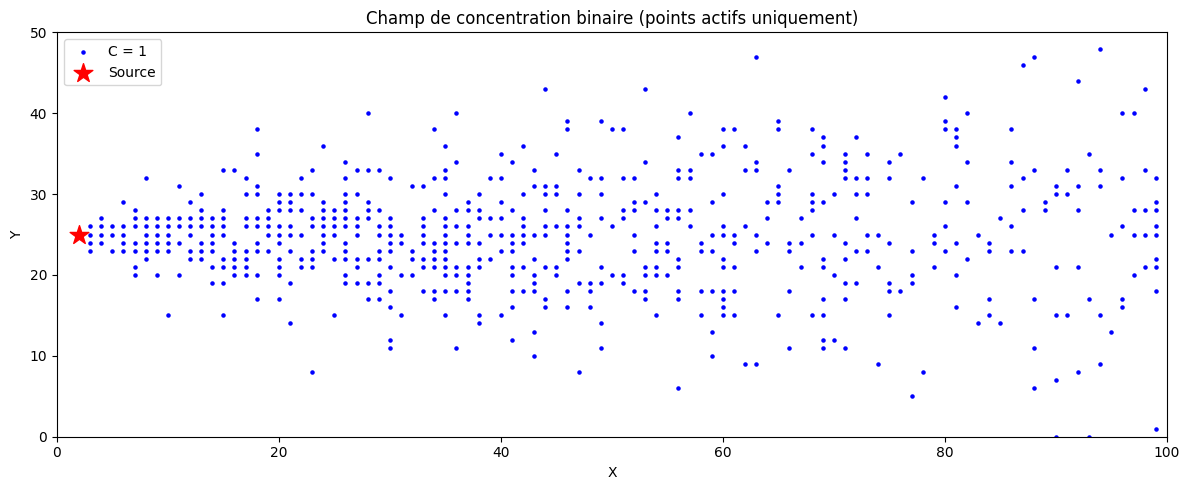

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# --- Définition du champ (paramètres physiques) ---
domain_x, domain_y = 100, 50
x0, y0 = 2, domain_y // 2

V = 5.0
D = 3.0
tau = 10

X, Y = np.meshgrid(np.arange(domain_x), np.arange(domain_y))

c = np.zeros_like(X, dtype=float)
downwind = (X >= x0)
x_dist = X - x0
y_dist = Y - y0

with np.errstate(divide='ignore', invalid='ignore'):
    spread = 4 * D * x_dist / V
    in_field = downwind & (spread > 0)
    c[in_field] = np.exp(-x_dist[in_field] / (V * tau)) * np.exp(-y_dist[in_field] ** 2 / spread[in_field])

# --- Discrétisation : chaque point est activé si c > seuil ou c tirage de type Bernoulli ---

# np.random.seed(42)
concentration = (np.random.rand(*c.shape) < c / c.max()).astype(int)

# --- Extraire seulement les points de concentration ---
y_pts, x_pts = np.where(concentration == 1)

plt.figure(figsize=(12, 5))
plt.scatter(x_pts, y_pts, color='b', s=5, label='C = 1')
plt.scatter([x0], [y0], c='red', marker='*', s=200, label='Source')
plt.title("Champ de concentration binaire (points actifs uniquement)")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, domain_x)
plt.ylim(0, domain_y)
plt.legend()
plt.tight_layout()
plt.show()


Succès


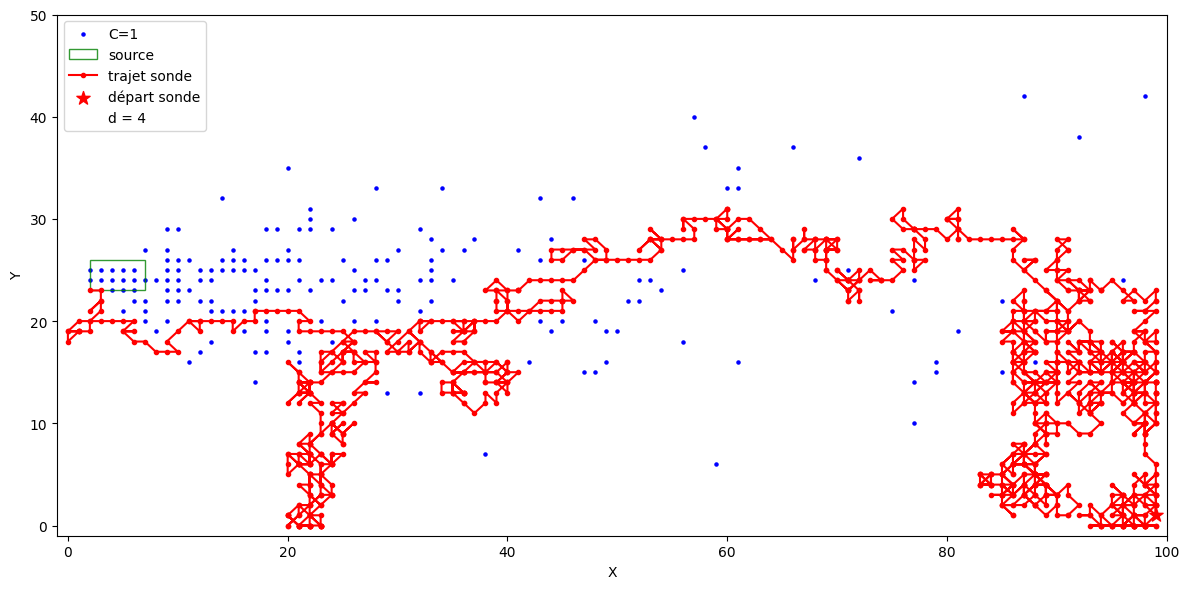

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ---- Paramètres du domaine et de la source ----
a, b = 5, 3
domain_x, domain_y = 100, 50
d = 4

source_x = 2
source_y = int((domain_y - b) / 2)
x0, y0 = source_x, source_y + b // 2  # position centre source

# ---- Paramètres champ infotaxis ----
V = 2.0      # vitesse vent (x)
D = 1.0      # diffusion latérale
tau = 10     # durée de vie

X, Y = np.meshgrid(np.arange(domain_x), np.arange(domain_y))

# ---- Génération du champ de concentration (infotaxis) ----
c = np.zeros_like(X, dtype=float)
downwind = X >= x0
x_dist = X - x0
y_dist = Y - y0

with np.errstate(divide='ignore', invalid='ignore'):
    spread = 4 * D * x_dist / V
    in_field = downwind & (spread > 0)
    c[in_field] = np.exp(-x_dist[in_field] / (V * tau)) * np.exp(-y_dist[in_field] ** 2 / spread[in_field])

# ---- Discrétisation binaire : points de concentration "présents" ou non ----
np.random.seed()  # seed non fixé pour trajectoire aléatoire
concentration = (np.random.rand(*c.shape) < c / c.max()).astype(int)

# Ajoute la zone source : tous les points dans le rectangle sont à concentration 1
concentration[source_y:source_y+b, source_x:source_x+a] = 1

# ---- Déplacement sonde selon la concentration ----
sonde_x, sonde_y = domain_x - 1, np.random.randint(0, domain_y)
trouve = False
trajet_sonde = [(sonde_x, sonde_y)]

max_tot_iter = 3000
total_iter = 0
iterations_max = 100

def dans_source(x, y):
    return source_x <= x <= source_x + a and source_y <= y <= source_y + b

while sonde_x > 0 and not trouve and not dans_source(sonde_x, sonde_y) and total_iter < max_tot_iter:
    for _ in range(iterations_max):
        sonde_x += np.random.choice([-1, 0, 1])
        sonde_y += np.random.choice([-1, 0, 1])
        sonde_x = min(max(sonde_x, 0), domain_x-1)
        sonde_y = min(max(sonde_y, 0), domain_y-1)
        trajet_sonde.append((sonde_x, sonde_y))
        total_iter += 1
        if concentration[sonde_y, sonde_x] == 1:
            for _ in range(d):
                sonde_x -= 1
                sonde_x = max(sonde_x, 0)
                trajet_sonde.append((sonde_x, sonde_y))
                total_iter += 1
                if dans_source(sonde_x, sonde_y):
                    trouve = True
                    break
            break
        if dans_source(sonde_x, sonde_y):
            trouve = True
            break
        if total_iter >= max_tot_iter:
            break

print('Succès' if trouve else 'Echec (maximum d\'itérations atteint sans trouver la source)')

# ---- Plot ----
y_pts, x_pts = np.where(concentration == 1)
plt.figure(figsize=(12, 6))
plt.scatter(x_pts, y_pts, c='b', s=5, label='C=1')
rect = plt.Rectangle((source_x, source_y), a, b,
                     linewidth=1, edgecolor='green',
                     facecolor='none', alpha=0.8, label='source')
plt.gca().add_patch(rect)
trajet_x, trajet_y = zip(*trajet_sonde)
plt.plot(trajet_x, trajet_y, 'r.-', label='trajet sonde')
plt.scatter(trajet_x[0], trajet_y[0], c='red', s=100, marker='*', label='départ sonde')
plt.xlim(-1, domain_x)
plt.ylim(-1, domain_y)
plt.xlabel('X')
plt.ylabel('Y')
d_patch = mpatches.Patch(color='none', label=f'd = {d}')
plt.legend(loc='upper left', handles=plt.gca().get_legend_handles_labels()[0] + [d_patch])
plt.tight_layout()
plt.show()


---

<font size ="4">

<br>
 
# Boucles 

<br>

</font>


--- Résultats par valeur de d ---
d=  2:  54/100 succès, moyenne pas (succès): 1707.1, % win: 54.0
d=  4:  60/100 succès, moyenne pas (succès): 1528.0, % win: 60.0
d=  6:  63/100 succès, moyenne pas (succès): 1362.0, % win: 63.0
d=  8:  46/100 succès, moyenne pas (succès): 1290.6, % win: 46.0
d= 10:  43/100 succès, moyenne pas (succès): 1199.3, % win: 43.0
d= 12:  31/100 succès, moyenne pas (succès): 1084.9, % win: 31.0
d= 14:  36/100 succès, moyenne pas (succès): 1039.9, % win: 36.0
d= 16:  36/100 succès, moyenne pas (succès): 883.8, % win: 36.0
d= 18:  32/100 succès, moyenne pas (succès): 892.2, % win: 32.0
d= 20:  26/100 succès, moyenne pas (succès): 818.2, % win: 26.0


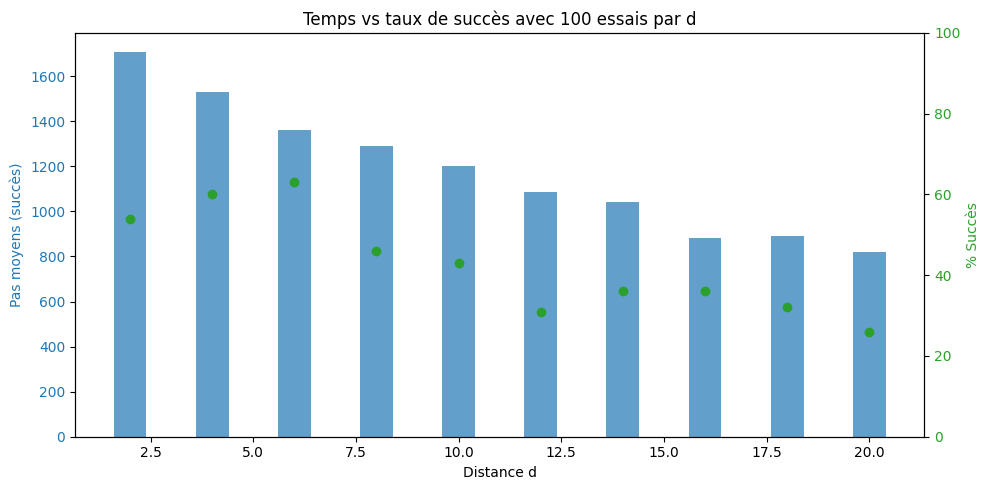

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ---- PARAMETERS ----
a, b = 5, 3
domain_x, domain_y = 100, 50
source_x = 2
source_y = int((domain_y - b) / 2)
x0, y0 = source_x, source_y + b // 2

V = 2.0
D = 1.0
tau = 10

max_tot_iter = 3000
iterations_max = 100
n_essais = 100
d_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

results = []

for d in d_values:
    n_success = 0
    iter_success = []
    for essai in range(n_essais):
        # ---- GENERATE ADVECTION-DIFFUSION FIELD ----
        X, Y = np.meshgrid(np.arange(domain_x), np.arange(domain_y))
        c = np.zeros_like(X, dtype=float)
        downwind = X >= x0
        x_dist = X - x0
        y_dist = Y - y0
        with np.errstate(divide='ignore', invalid='ignore'):
            spread = 4 * D * x_dist / V
            in_field = downwind & (spread > 0)
            c[in_field] = np.exp(-x_dist[in_field] / (V * tau)) * np.exp(-y_dist[in_field] ** 2 / spread[in_field])
        np.random.seed()  # random field per trial
        concentration = (np.random.rand(*c.shape) < c / c.max()).astype(int)
        concentration[source_y:source_y+b, source_x:source_x+a] = 1

        # ---- TRACKING ----
        sonde_x, sonde_y = domain_x - 1, np.random.randint(0, domain_y)
        trouve = False
        total_iter = 0

        def dans_source(x, y):
            return source_x <= x <= source_x + a and source_y <= y <= source_y + b

        while sonde_x > 0 and not trouve and not dans_source(sonde_x, sonde_y) and total_iter < max_tot_iter:
            for _ in range(iterations_max):
                sonde_x += np.random.choice([-1, 0, 1])
                sonde_y += np.random.choice([-1, 0, 1])
                sonde_x = min(max(sonde_x, 0), domain_x-1)
                sonde_y = min(max(sonde_y, 0), domain_y-1)
                total_iter += 1
                if concentration[sonde_y, sonde_x] == 1:
                    for _ in range(d):
                        sonde_x -= 1
                        sonde_x = max(sonde_x, 0)
                        total_iter += 1
                        if dans_source(sonde_x, sonde_y):
                            trouve = True
                            break
                    break
                if dans_source(sonde_x, sonde_y):
                    trouve = True
                    break
                if total_iter >= max_tot_iter:
                    break
        if trouve:
            n_success += 1
            iter_success.append(total_iter)

    mean_steps = np.mean(iter_success) if iter_success else 0.0  # 0 if no success
    percent_success = 100 * n_success / n_essais
    results.append({'d': d, 'success': n_success, 'n': n_essais,
                    'mean_steps': mean_steps, 'percent_success': percent_success})

# ---- PRINT RESULTS ----
print("\n--- Résultats par valeur de d ---")
for res in results:
    print(f"d={res['d']:>3}: {res['success']:>3}/{res['n']} succès, "
          f"moyenne pas (succès): {res['mean_steps']:.1f}, % win: {res['percent_success']:.1f}")

# ---- PLOT ----
d_labels = [r['d'] for r in results]
moyenne_steps = [r['mean_steps'] for r in results]
success_percent = [r['percent_success'] for r in results]

fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Distance d')
ax1.set_ylabel('Pas moyens (succès)', color=color)
bars = ax1.bar(d_labels, moyenne_steps, color=color, alpha=0.7, label='Pas moyens')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('% Succès', color=color)
ax2.scatter(d_labels, success_percent, color=color, marker='o', label='% Succès')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0, top=100)

plt.title(f"Temps vs taux de succès avec {n_essais} essais par d")
fig.tight_layout()
plt.show()
